>NAMA : M Rohmatul Mauludi
>
>KELAS :TI--3A
>
>NIM : 2141720062
>
>MATKUL : Machine Learning
>
>GITHUB : https://github.com/rudie999/ML/blob/main/Modul9_.ipynb

#**PRAKTIKUM 1**--Klasifikasi Iris dengan Perceptron

> DESKRIPSI
>
> Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.
Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

**Langkah 1**-- Import Library

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Langkah 2**-- Load Data dan Visualisasi

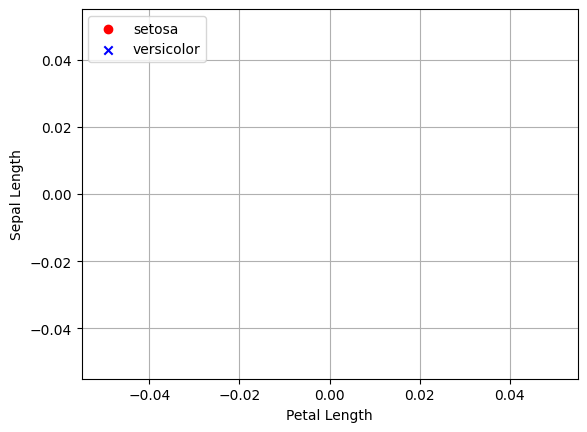

In [15]:
df = pd.read_csv('/content/sample_data/iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Langkah 3**-- Membuat Kelas Perceptron

In [16]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Langkah 4**-- Pilih Data dan Encoding Labe

In [17]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

**Langkah 5**--  Fitting Model

In [20]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

TypeError: ignored

**Langkah 6**-- Visualisasi Nilai Error Per Epoch

In [21]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

AttributeError: ignored

**Langkah 7**-- Visualiasasi Decision Boundary

In [23]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# **PRAKTIKUM 2**-- Klasifikasi Berita dengan Perceptron

> Deskripsi
>
> Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.

**Langkah 1**-- Import Library

In [25]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

**Langkah 2**-- Pilih Label dan Split Data

In [26]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

**Langkah 3**-- Ekstrak Fitur dan Buat Model Perceptron

In [27]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



>Penjelasan
>
>Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

#**PRAKTIKUM 3** -- Nilai Logika XOR dengan MLP

>Deskripsi
>
>Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

**Langkah 1** -- Import Library

In [28]:
from sklearn.neural_network import MLPClassifier

**Langkah 2** -- Buat Data   

In [29]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

**Langkah 3** -- Fit Model

In [30]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

**Langkah 4** -- Prediksi

In [31]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


#**PRAKTIKUM 4** -- Klasifikasi dengan ANN

>Deskripsi
>
>Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

**PERHATIAN**
Pada praktikum ini, Anda akan menggunakan library tensorflow dari google. Oleh karena itu, Anda diharuskan untuk menginstal tensorflow terlebih dahulu.
Anda juga perlu menyesuaikan instalasi tensorflow yang Anda gunakan pada komputer lokal, apakah komputasi pada,
> CPU
>
> GPU (GPU support CUDA)
>
> Apple Silicon (M1/M2)
>
>Panduan instalasi,
1. https://www.tensorflow.org/install
2. https://developer.apple.com/metal/tensorflow-plugin/
3.https://caffeinedev.medium.com/how-to-install-tensorflow-on-m1-mac-8e9b91d93706


PRA PENGOLAHAN DATA

**Langkah 1** -- Import Library

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Langkah 2** -- Load Data

In [3]:
dataset = pd.read_csv('/content/sample_data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data (X)

In [34]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


**Langkah 3** -- Encoding Data Kategorikal

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# Cek data (X) dengan print. Hasilnya,

print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**Langkah 4** -- Encoding Kolom "Geography" dengan One Hot Encoder

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Cek data (X) dengan print. Hasilnya,

print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Langkah 5** -- Split Data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Langkah 6** -- Scaling Fitur

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MEMBUAT MODEL ANN

**Langkah 1** -- Inisiasi Model ANN

In [8]:
ann = tf.keras.models.Sequential()

**Langkah 2** -- Membuat Input Layer dan Hidden Layer Pertama

In [9]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 3** -- Membuat Hidden Layer Kedua

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 4** -- Membuat Output Layer

In [11]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

TRAINING MODEL

**Langkah 1** -- Compile Model (Menyatukan Arsitektur) ANN

In [12]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 2** -- Fitting Model

In [13]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5959 - accuracy: 0.7156
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4608 - accuracy: 0.7964
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8025
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8161
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8280
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8345
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8432
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8503
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8525
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3631 - accura

**Membuat Prediksi**

Diberikan informasi sebagai berikut,
* Geography: France
* Credit Score: 600
*  Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: $ 60000
* Number of Products: 2
* Does this customer have a credit card ? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

**Modelkan Data Baru dan Buat Prediksi**

In [14]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 201ms/step
[[False]]


**Prediksi Dengan Data Testing**

In [15]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Cek Akurasi dan Confusion Matrix**

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1519   76]
 [ 196  209]]


0.864

#**TUGAS**

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
2. Anda diperbolehkan melakukan eksplorasi terhadap,
* Metode pra pengolahan
* Pemilihan fitur
* Arsitektur ANN
* Fungsi Aktiviasi
3. ANN diimplementasikan dengan menggunakan tensorflow.
4. DIKERJAKAN SECARA BERKELOMPOK
5. JELASKAN HASIL YANG ANDA DAPATKAN,
* AKURASI
* CONFUSION MATRIX
* KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [18]:
#Soal nomor 1

# Import library
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Unduh dataset MNIST
mnist = keras.datasets.mnist

# Memisahkan data menjadi pelatihan dan pengujian
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Bagi data menjadi data pelatihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Normalisasi data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Soal nomor 2


Dataset MNIST sudah berisi gambar tangan angka, jadi tidak ada pemilihan fitur yang diperlukan.

In [19]:
#Soal nomor 3

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Lapisan input
    keras.layers.Dense(128, activation='relu'),  # Lapisan tersembunyi pertama
    keras.layers.Dense(64, activation='relu'),   # Lapisan tersembunyi kedua
    keras.layers.Dense(10, activation='softmax')  # Lapisan output
])


In [20]:
#Soal nomor 4

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
#Soal nomor 5

# Pelatihan model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2586 - accuracy: 0.9256 - val_loss: 0.1387 - val_accuracy: 0.9590
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1080 - accuracy: 0.9672 - val_loss: 0.1004 - val_accuracy: 0.9689
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0757 - accuracy: 0.9765 - val_loss: 0.1118 - val_accuracy: 0.9663
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0564 - accuracy: 0.9817 - val_loss: 0.0867 - val_accuracy: 0.9750
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0447 - accuracy: 0.9854 - val_loss: 0.0943 - val_accuracy: 0.9737
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0977 - val_accuracy: 0.9744
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0942 - val_accurac

In [24]:
#Soal nomor 6
#akurasi
accuracy = model.evaluate(X_test, y_test)[1]
print("Akurasi: {:.2f}%".format(accuracy * 100))


313/313 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9778
Akurasi: 97.78%


313/313 [==============================] - 2s 4ms/step


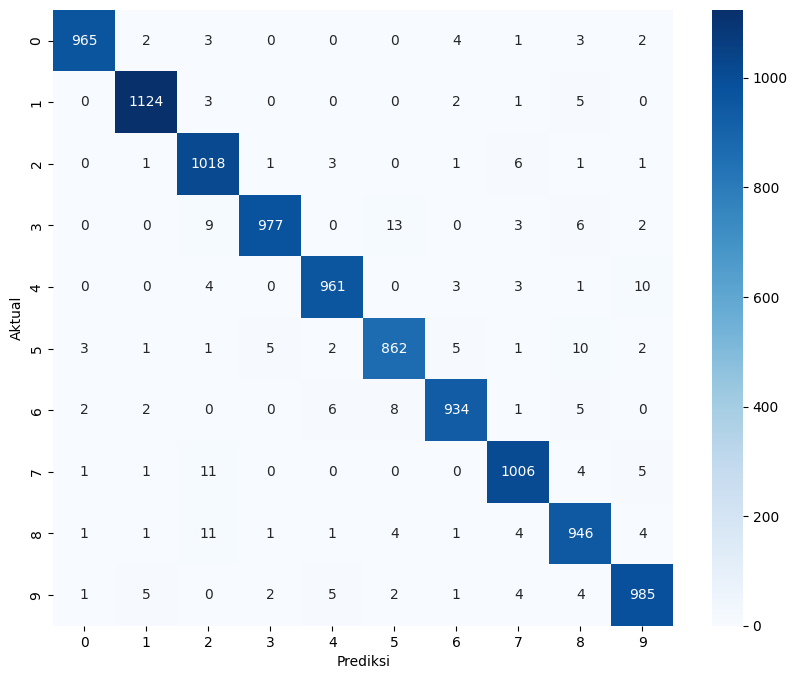

In [26]:
#confusion matrix
# Menggunakan model untuk mendapatkan prediksi
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=-1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()



In [28]:
#konfigurasi model

# Inisiasi model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Lapisan input
    keras.layers.Dense(128, activation='relu'),  # Lapisan tersembunyi pertama
    keras.layers.Dense(64, activation='relu'),   # Lapisan tersembunyi kedua
    keras.layers.Dense(10, activation='softmax')  # Lapisan output
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



**ANALISIS HASIL :**

1. Akurasi (Accuracy): Akurasi adalah metrik yang menunjukkan seberapa baik model kita dalam mengklasifikasikan gambar-gambar MNIST. Semakin tinggi akurasi, semakin baik performa model.

2. onfusion Matrix: Confusion matrix adalah alat yang berguna untuk memahami seberapa baik model kita dalam mengklasifikasikan setiap kelas. Dengan confusion matrix, kita dapat melihat seberapa banyak gambar yang diklasifikasikan dengan benar dan seberapa banyak yang salah klasifikasi.

Dengan menggunakan akurasi dan confusion matrix, kita dapat menilai seberapa baik model kita dalam mengklasifikasikan dataset MNIST.